# YOLOv8三角板关键点模型预测

本次基于YOLOv8预训练的三角板关键点模型进行预测，分别完成图片、视频与摄像头实时拍摄检测任务

## 配置工作

In [5]:
# 安装YOLOv8模型

!pip install ultralytics --upgrade -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [6]:
# 导入数据分析库

!pip install numpy opencv-python pillow pandas matplotlib seaborn tqdm -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## 参数说明

- YOLOV8命令行模板：

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
      classify     predict      yolov8n-cls.yaml    args...
      segment      val        yolov8n-seg.yaml    args...
               export         yolov8n.pt     format=onnx  args...
```

- **基础参数**

model YOLOV8模型

source 输入模型预测的图像、视频、文件夹路径

device 计算设备（device=0 或 device=0,1,2,3 或 device=cpu）

verbose 是否输出每一帧的预测结果，默认为True

- **后处理参数**

conf 目标检测置信度，默认0.25

classes 只显示哪个或哪些类别的预测结果（class=0 或 class=[0,2,3]）

- **可视化参数**

show 是否将预测结果显示在屏幕上，默认为False。摄像头实时预测时，建议开启

show_labels 是否显示目标检测框类别文字，默认为True

show_conf 是否显示目标检测框置信度，默认为True

line_thickness 目标检测框线宽，默认为3

max_det 一张图像最多预测多少个框，默认为300

boxes 是否在实例分割预测结果中显示目标检测框

visualize 可视化模型特征

- **保存结果参数**

save 保存预测结果可视化图像，默认为False

save_txt 将预测结果保存为txt文件，默认为False

save_conf 保存的预测结果中，包含置信度，默认为False

save_crop 保存的预测结果可视化图像中，是否裁切，默认为False

- **其它参数**

half 是否开启半精度（FP16），默认为False

augment 对输入数据做数据扩增，默认False

## 下载测试样例与模型权重文件

### 测试图像

In [7]:
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_1.jpg -P images
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_2.jpg -P images
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_3.jpg -P images
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_4.jpg -P images

--2023-08-27 12:16:18--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_1.jpg
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1361630 (1.3M) [image/jpeg]
Saving to: ‘images/triangle_1.jpg.1’

triangle_1.jpg.1    100%[===================>]   1.30M  2.91MB/s    in 0.4s    

2023-08-27 12:16:19 (2.91 MB/s) - ‘images/triangle_1.jpg.1’ saved [1361630/1361630]

--2023-08-27 12:16:19--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_2.jpg
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... conn

### 测试视频

In [8]:
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_6.mp4 -P videos
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_7.mp4 -P videos
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_9.mp4 -P videos

--2023-08-27 12:16:24--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_6.mp4
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4361332 (4.2M) [video/mp4]
Saving to: ‘videos/triangle_6.mp4.1’

triangle_6.mp4.1    100%[===================>]   4.16M  7.10MB/s    in 0.6s    

2023-08-27 12:16:25 (7.10 MB/s) - ‘videos/triangle_6.mp4.1’ saved [4361332/4361332]

--2023-08-27 12:16:25--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_7.mp4
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected

### 模型权重

In [9]:
# yolov8n-pose 预训练模型微调
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8n_pretrain.pt -P checkpoint

# yolov8s-pose 预训练模型微调
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8s_pretrain.pt -P checkpoint

# yolov8m-pose 预训练模型微调
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8m_pretrain.pt -P checkpoint

# yolov8x-pose-p6 预训练模型微调
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8x_p6_pretrain.pt -P checkpoint


--2023-08-27 12:16:27--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8n_pretrain.pt
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.163, 121.36.235.162
Connecting to zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)|121.36.235.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6405855 (6.1M) [binary/octet-stream]
Saving to: ‘checkpoint/Triangle_215_yolov8n_pretrain.pt’

Triangle_215_yolov8 100%[===================>]   6.11M  10.5MB/s    in 0.6s    

2023-08-27 12:16:28 (10.5 MB/s) - ‘checkpoint/Triangle_215_yolov8n_pretrain.pt’ saved [6405855/6405855]

--2023-08-27 12:16:28--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8s_pretrain.pt
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (

# 使用命令行进行预测---以图片为例

In [10]:
!yolo pose predict model=checkpoint/Triangle_215_yolov8x_p6_pretrain.pt source=images/triangle_1.jpg device=0

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose-p6 summary (fused): 375 layers, 99127672 parameters, 0 gradients

image 1/1 /content/images/triangle_4.jpg: 896x1280 3 sjb_rects, 150.2ms
Speed: 23.9ms preprocess, 150.2ms inference, 50.3ms postprocess per image at shape (1, 3, 896, 1280)
Results saved to runs/pose/predict


In [11]:
# 保存 框---中心点、置信度等等信息 为 txt 文件， 并以 crop 的形式存储各个三角板

!yolo pose predict model=checkpoint/Triangle_215_yolov8x_p6_pretrain.pt source=images/triangle_1.jpg device=0 save_txt save_crop

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose-p6 summary (fused): 375 layers, 99127672 parameters, 0 gradients

image 1/1 /content/images/triangle_4.jpg: 896x1280 3 sjb_rects, 149.6ms
Speed: 11.8ms preprocess, 149.6ms inference, 1.9ms postprocess per image at shape (1, 3, 896, 1280)
Results saved to runs/pose/predict2
1 label saved to runs/pose/predict2/labels


# 使用Python高级API进行预测

## 图片

### 配置

In [12]:
from ultralytics import YOLO
import torch

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


In [13]:
model = YOLO('checkpoint/Triangle_215_yolov8x_p6_pretrain.pt')
# model = YOLO('checkpoint/Triangle_215_yolov8n_pretrain.pt')

In [14]:
model.to(device)
# model.cuda() # GPU

### 解析预测结果---框

In [15]:
img_path = 'images/triangle_1.jpg'
results = model(img_path)


image 1/1 /content/images/triangle_4.jpg: 896x1280 3 sjb_rects, 150.8ms
Speed: 12.1ms preprocess, 150.8ms inference, 2.0ms postprocess per image at shape (1, 3, 896, 1280)


In [16]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'sjb_rect'}
orig_img: array([[[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
   

In [17]:
# 预测框的所有类别（MS COCO数据集八十类）

results[0].names

{0: 'sjb_rect'}

In [18]:
# 预测类别 ID

results[0].boxes.cls

tensor([0., 0., 0.], device='cuda:0')

In [19]:
num_bbox = len(results[0].boxes.cls)
print('预测出 {} 个框'.format(num_bbox))

预测出 3 个框


In [20]:
# 每个框的置信度

results[0].boxes.conf

tensor([0.9731, 0.9673, 0.9624], device='cuda:0')

In [21]:
# 每个框的：左上角XY坐标、右下角XY坐标

results[0].boxes.xyxy

tensor([[1739., 1895., 2555., 3574.],
        [2921.,  658., 4447., 1542.],
        [1235.,  445., 2544., 1758.]], device='cuda:0')

In [22]:
# 转成整数的 numpy array

bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')
bboxes_xyxy

array([[1739, 1895, 2555, 3574],
       [2921,  658, 4447, 1542],
       [1235,  445, 2544, 1758]], dtype=uint32)

### 解析预测结果---关键点

In [23]:
# 每个框，每个关键点的 XY坐标 置信度

results[0].keypoints.shape

torch.Size([3, 3, 3])

In [24]:
# 获取keypoints的data，并将其转为int32类型数据

bboxes_keypoints = results[0].keypoints.data.cpu().numpy().astype('uint32')

### 可视化

In [25]:
img_bgr = cv2.imread(img_path)

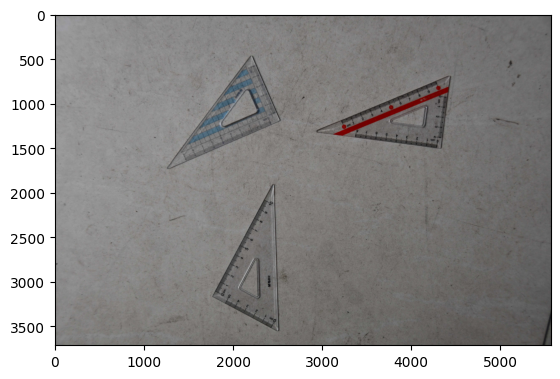

In [26]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [27]:
# 框
bbox_color = (100, 50, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':4,         # 字体大小
    'font_thickness':10,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [28]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'angle_30', 'color':[255, 0, 0], 'radius':40},      # 30度角点
    1:{'name':'angle_60', 'color':[0, 255, 0], 'radius':40},      # 60度角点
    2:{'name':'angle_90', 'color':[0, 0, 255], 'radius':40},      # 90度角点
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':10,       # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':120,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':12},        # 30度角点-60度角点
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':12},        # 30度角点-90度角点
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':12},         # 60度角点-90度角点
]

In [29]:
for idx in range(num_bbox): # 遍历每个框

    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx]

    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = results[0].names[0]

    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度

    # 画该框的骨架连接
    for skeleton in skeleton_map:

        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

        # 获取骨架连接颜色
        skeleton_color = skeleton['color']

        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']

        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)

    # 画该框的关键点
    for kpt_id in kpt_color_map:

        # 获取该关键点的颜色、半径、XY坐标
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]

        # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

        # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        # kpt_label = str(kpt_id) # 写关键点类别 ID
        kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

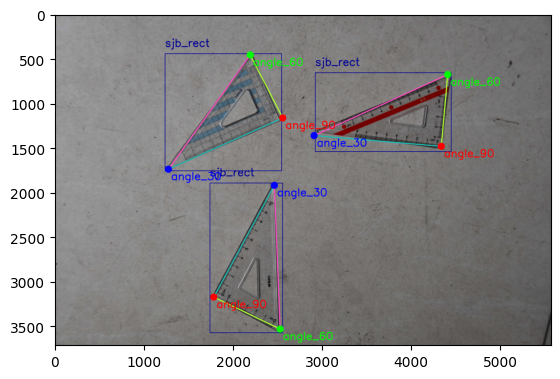

In [30]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 视频

In [31]:
import cv2
import numpy as np
import time
from tqdm import tqdm

from ultralytics import YOLO

import matplotlib.pyplot as plt
%matplotlib inline

import torch
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


In [32]:
# model = YOLO('checkpoint/Triangle_215_yolov8n_pose_pretrain.pt')
model = YOLO('checkpoint/Triangle_215_yolov8x_p6_pretrain.pt')
model.to(device)

### 可视化配置

In [33]:
bbox_color = (100, 50, 0)             # 框的 BGR 颜色
bbox_thickness = 2                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':1,         # 字体大小
    'font_thickness':2,       # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-10,        # Y 方向，文字偏移距离，向下为正
}



# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'angle_30', 'color':[255, 0, 0], 'radius':6},      # 30度角点
    1:{'name':'angle_60', 'color':[0, 255, 0], 'radius':6},      # 60度角点
    2:{'name':'angle_90', 'color':[0, 0, 255], 'radius':6},      # 90度角点
}

# 点类别文字
kpt_labelstr = {
    'font_size':1,             # 字体大小
    'font_thickness':3,       # 字体粗细
    'offset_x':10,             # X 方向，文字偏移距离，向右为正
    'offset_y':0,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':2},        # 30度角点-60度角点
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':2},        # 30度角点-90度角点
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':2},         # 60度角点-90度角点
]

### 逐帧处理

In [37]:
def process_frame(img_bgr):

    '''
    输入摄像头画面 bgr-array，输出图像 bgr-array
    '''

    results = model(img_bgr, verbose=False) # verbose设置为False，不单独打印每一帧预测结果

    # 预测框的个数
    num_bbox = len(results[0].boxes.cls)

    # 预测框的 xyxy 坐标
    bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

    # 关键点的 xy 坐标
    bboxes_keypoints = results[0].keypoints.data.cpu().numpy().astype('uint32')

    for idx in range(num_bbox): # 遍历每个框

        # 获取该框坐标
        bbox_xyxy = bboxes_xyxy[idx]

        # 获取框的预测类别（对于关键点检测，只有一个类别）
        bbox_label = results[0].names[0]

        # 画框
        img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

        # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

        bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度

        # 画该框的骨架连接
        for skeleton in skeleton_map:

            # 获取起始点坐标
            srt_kpt_id = skeleton['srt_kpt_id']
            srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
            srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

            # 获取终止点坐标
            dst_kpt_id = skeleton['dst_kpt_id']
            dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
            dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

            # 获取骨架连接颜色
            skeleton_color = skeleton['color']

            # 获取骨架连接线宽
            skeleton_thickness = skeleton['thickness']

            # 画骨架连接
            img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)

        # 画该框的关键点
        for kpt_id in kpt_color_map:

            # 获取该关键点的颜色、半径、XY坐标
            kpt_color = kpt_color_map[kpt_id]['color']
            kpt_radius = kpt_color_map[kpt_id]['radius']
            kpt_x = bbox_keypoints[kpt_id][0]
            kpt_y = bbox_keypoints[kpt_id][1]

            # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
            img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

            # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
            kpt_label = str(kpt_id) # 写关键点类别 ID（二选一）
            # kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称（二选一）
            img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

    return img_bgr

### 获取每一帧画面，并进行逐帧处理，最后封装为MP4文件

In [38]:
def generate_video(input_path='videos/robot.mp4'):
    filehead = input_path.split('/')[-1]
    output_path = "out-" + filehead

    print('视频开始处理',input_path)

    # 获取视频总帧数
    cap = cv2.VideoCapture(input_path)
    frame_count = 0
    while(cap.isOpened()):
        success, frame = cap.read()
        frame_count += 1
        if not success:
            break
    cap.release()
    print('视频总帧数为',frame_count)

    # cv2.namedWindow('Crack Detection and Measurement Video Processing')
    cap = cv2.VideoCapture(input_path)
    frame_size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
    # fourcc = cv2.VideoWriter_fourcc(*'XVID')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = cap.get(cv2.CAP_PROP_FPS)

    out = cv2.VideoWriter(output_path, fourcc, fps, (int(frame_size[0]), int(frame_size[1])))

    # 进度条绑定视频总帧数
    with tqdm(total=frame_count-1) as pbar:
        try:
            while(cap.isOpened()):
                success, frame = cap.read()
                if not success:
                    break

                # 处理帧
                # frame_path = './temp_frame.png'
                # cv2.imwrite(frame_path, frame)
                try:
                    frame = process_frame(frame)
                except Exception as error:
                    print('报错！', error)
                    pass

                if success == True:
                    # cv2.imshow('Video Processing', frame)
                    out.write(frame)

                    # 进度条更新一帧
                    pbar.update(1)

                # if cv2.waitKey(1) & 0xFF == ord('q'):
                    # break
        except:
            print('中途中断')
            pass

    cv2.destroyAllWindows()
    out.release()
    cap.release()
    print('视频已保存', output_path)

In [39]:
generate_video(input_path='videos/triangle_9.mp4')

视频开始处理 videos/triangle_9.mp4
视频总帧数为 319


100%|██████████| 318/318 [00:51<00:00,  6.23it/s]

视频已保存 out-triangle_9.mp4


## 摄像头实时检测

此时需要在本地运行，整体代码框架与视频处理高度相似

### 准备工作

In [ ]:
import cv2
import numpy as np
import time
from tqdm import tqdm

from ultralytics import YOLO

import matplotlib.pyplot as plt
%matplotlib inline

import torch
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

In [ ]:
# model = YOLO('checkpoint/Triangle_215_yolov8n_pretrain.pt')

# model = YOLO('checkpoint/Triangle_215_yolov8s_pretrain.pt')

model = YOLO('checkpoint/Triangle_215_yolov8m_pretrain.pt')

# model = YOLO('checkpoint/Triangle_215_yolov8l_pretrain.pt')


model.to(device)

### 可视化配置

In [ ]:
# 框
bbox_color = (100, 50, 0)             # 框的 BGR 颜色
bbox_thickness = 2                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':1,         # 字体大小
    'font_thickness':2,    # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-10,        # Y 方向，文字偏移距离，向下为正
}

In [ ]:
# 关键点
kpt_color_map = {
    0:{'name':'angle_30', 'color':[255, 0, 0], 'radius':6},      # 30度角点
    1:{'name':'angle_60', 'color':[0, 255, 0], 'radius':6},      # 60度角点
    2:{'name':'angle_90', 'color':[0, 0, 255], 'radius':6},      # 90度角点
}

# 点类别文字
kpt_labelstr = {
    'font_size':1.5,             # 字体大小
    'font_thickness':3,       # 字体粗细
    'offset_x':10,             # X 方向，文字偏移距离，向右为正
    'offset_y':0,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':2},        # 30度角点-60度角点
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':2},        # 30度角点-90度角点
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':2},         # 60度角点-90度角点
]

### 逐帧处理

In [ ]:
def process_frame(img_bgr):

    '''
    输入摄像头画面 bgr-array，输出图像 bgr-array
    '''

    # 记录该帧开始处理的时间
    start_time = time.time()

    results = model(img_bgr, verbose=False) # verbose设置为False，不单独打印每一帧预测结果

    # 预测框的个数
    num_bbox = len(results[0].boxes.cls)

    # 预测框的 xyxy 坐标
    bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

    # 关键点的 xy 坐标
    bboxes_keypoints = results[0].keypoints.data.cpu().numpy().astype('uint32')

    for idx in range(num_bbox): # 遍历每个框

        # 获取该框坐标
        bbox_xyxy = bboxes_xyxy[idx]

        # 获取框的预测类别（对于关键点检测，只有一个类别）
        bbox_label = results[0].names[0]

        # 画框
        img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

        # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

        bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度

        # 画该框的骨架连接
        for skeleton in skeleton_map:

            # 获取起始点坐标
            srt_kpt_id = skeleton['srt_kpt_id']
            srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
            srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

            # 获取终止点坐标
            dst_kpt_id = skeleton['dst_kpt_id']
            dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
            dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

            # 获取骨架连接颜色
            skeleton_color = skeleton['color']

            # 获取骨架连接线宽
            skeleton_thickness = skeleton['thickness']

            # 画骨架连接
            img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)

        # 画该框的关键点
        for kpt_id in kpt_color_map:

            # 获取该关键点的颜色、半径、XY坐标
            kpt_color = kpt_color_map[kpt_id]['color']
            kpt_radius = kpt_color_map[kpt_id]['radius']
            kpt_x = bbox_keypoints[kpt_id][0]
            kpt_y = bbox_keypoints[kpt_id][1]

            # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
            img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

            # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
            kpt_label = str(kpt_id) # 写关键点类别 ID（二选一）
            # kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称（二选一）
            img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

    # 记录该帧处理完毕的时间
    end_time = time.time()
    # 计算每秒处理图像帧数FPS
    FPS = 1/(end_time - start_time)

    # 在画面上写字：图片，字符串，左上角坐标，字体，字体大小，颜色，字体粗细
    FPS_string = 'FPS  '+str(int(FPS)) # 写在画面上的字符串
    img_bgr = cv2.putText(img_bgr, FPS_string, (25, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255, 0, 255), 2)

    return img_bgr

### 摄像头预测

In [ ]:
import cv2
import time

# 获取摄像头，传入0表示获取系统默认摄像头
cap = cv2.VideoCapture(0)

# 打开cap
cap.open(0)

# 无限循环，直到break被触发
while cap.isOpened():

    # 获取画面
    success, frame = cap.read()

    if not success: # 如果获取画面不成功，则退出
        print('获取画面不成功，退出')
        break

    ## 逐帧处理
    frame = process_frame(frame)

    # 展示处理后的三通道图像
    cv2.imshow('my_window',frame)

    key_pressed = cv2.waitKey(48) # 每隔多少毫秒毫秒，获取键盘哪个键被按下
    # print('键盘上被按下的键：', key_pressed)

    if key_pressed in [ord('q'),27]: # 按键盘上的q或esc退出（在英文输入法下）
        break

# 关闭摄像头
cap.release()

# 关闭图像窗口
cv2.destroyAllWindows()